In [1]:
from nltk.tokenize.casual import casual_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import pandas as pd
import string
import os
from timeit import default_timer as timer

np.random.seed=42

input_filepath="../../data/clean/"
pd.set_option('display.max_rows', 150)
filename="trisma2016_cleaned_text_by_lga_and_time_of_day.csv"

In [2]:
tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0, keep_default_na=False)
docs = tweetdf[['lga','time_of_day','cleaned']][tweetdf.cleaned != '']
docs.columns = ['LGA','time_of_day','cleaned']
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [3]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def smc_tokeniser(doc):
    return [ps.stem(w) for w in doc.split(' ')]

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=smc_tokeniser,
    ngram_range=(1,3),
    max_features=500,
    stop_words='english',
    token_pattern=None)  

In [4]:
target_df = pd.read_csv(input_filepath+"filtered_nonlog_target.csv").iloc[:,1:]
target_df

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [5]:
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [6]:
# Expand targets to include time_of_day:
target_df = docs[['LGA','time_of_day']].merge(target_df, on='LGA')
target_df

,LGA,time_of_day,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,afternoon,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Albury,evening,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
2,Albury,morning,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
3,Albury,night,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
4,Armidale Regional,afternoon,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
5,Armidale Regional,evening,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
6,Armidale Regional,morning,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
7,Armidale Regional,night,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
8,Ballina,afternoon,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
9,Ballina,evening,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891


In [7]:
# SHUFFLE DOCS AND TARGETS IN PLACE PRESERVING GROUPS:
assert len(target_df) == len(docs)
indices = np.arange(len(target_df))
np.random.shuffle(indices.reshape((-1, 4))) # Keeps 4 times of day together
docs = docs.iloc[indices,:]
target_df = target_df.iloc[indices,:]
target_df

,LGA,time_of_day,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
396,Tamworth Regional,afternoon,550.8377,541.0013,545.9195,265.5825,1309.8790,304.9280
397,Tamworth Regional,evening,550.8377,541.0013,545.9195,265.5825,1309.8790,304.9280
398,Tamworth Regional,morning,550.8377,541.0013,545.9195,265.5825,1309.8790,304.9280
399,Tamworth Regional,night,550.8377,541.0013,545.9195,265.5825,1309.8790,304.9280
64,Camden,afternoon,277.1012,218.6987,547.9895,109.3494,550.4747,100.6511
65,Camden,evening,277.1012,218.6987,547.9895,109.3494,550.4747,100.6511
66,Camden,morning,277.1012,218.6987,547.9895,109.3494,550.4747,100.6511
67,Camden,night,277.1012,218.6987,547.9895,109.3494,550.4747,100.6511
156,Glen Innes Severn,afternoon,1185.4171,805.1890,436.1440,313.1291,1666.2939,212.4804
157,Glen Innes Severn,evening,1185.4171,805.1890,436.1440,313.1291,1666.2939,212.4804


## Linear Model Lasso:

In [8]:
from collections import defaultdict
from sklearn import linear_model
from sklearn.model_selection import GroupKFold # Needed for aggregations

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
# THE DATA IS ASSUMED TO BE SHUFFLED (PRESERVING GROUPS) PRIOR TO THIS METHOD BEING CALLED
def tfidf_cv(X, y, max_features=None, folds=5, alpha=0.01):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    models = [] # List of models for later inspection
    
    groups = np.arange(len(y)) // 4
    gkf = GroupKFold(n_splits=folds)
    for train_index, test_index in gkf.split(X, y, groups):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = linear_model.Lasso(alpha=alpha,random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.coef_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        #Save model
        models.append(model)
        
        print('Finished processing',len(preds),'records...')

    return preds, importants, models

In [9]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def tfidf_metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=lambda x: np.abs(importants.get(x)), reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()    

"grid search" on max features to test the boundaries of where overfitting begins...

Finished processing 160 records...
Finished processing 320 records...
Finished processing 480 records...
Finished TF-IDF 3 fold cross validation in 561.7000893771183 seconds
MOST IMPORTANT FEATURES:
plain 2056.09219477
walgett 1206.00446186
glen inn 865.065678456
pine 536.503459625
12 512.719236376
cowan -511.329009184
park nsw 494.458839163
phil 491.689181109
wentworth 486.813966773
centuri 21 471.113260853
cobar 428.036446005
griffith 416.589953299
#bushfir #nswfire advic 406.434611677
#sydney -390.141649275
kempsey 383.682672649
broken hill 378.82323689
way -369.136785067
2747 366.902917265
there' -360.589904769
condobolin 351.412876172
R2: -0.0819120782486
RMSE: 305.055639743
MAPE: 55.3131571939
Mean APE Baseline: 72.0914035637


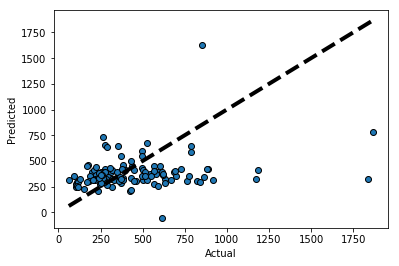

Finished processing 160 records...
Finished processing 320 records...
Finished processing 480 records...
Finished TF-IDF 3 fold cross validation in 565.3645844410639 seconds
MOST IMPORTANT FEATURES:
plain 1862.85705742
walgett 1147.82745816
glen inn 805.948797142
centuri 21 608.090805615
phil 521.13821453
condobolin 496.887817707
broken hill 387.842809687
griffith 378.952255427
cobar 373.53030505
wentworth 371.479274409
#sydney -338.088998825
cowan -316.449231976
park 312.388938442
kempsey 289.217270984
coff 283.810711559
coonambl 283.324329969
dubbo 275.452891904
st 255.800310918
advic bush 251.883717296
#nswfire advic bush 234.344578234
R2: -0.0401290199765
RMSE: 299.107071406
MAPE: 58.7506366913
Mean APE Baseline: 72.0914035637


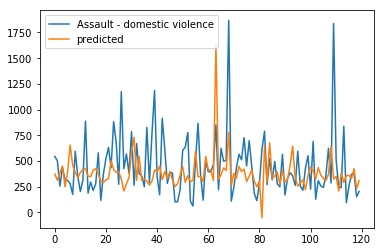

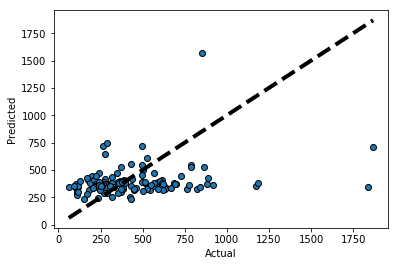

Finished processing 160 records...
Finished processing 320 records...
Finished processing 480 records...
Finished TF-IDF 3 fold cross validation in 568.4116550390609 seconds
MOST IMPORTANT FEATURES:
plain 1613.50742293
walgett 1087.03980485
glen inn 772.064487813
condobolin 394.163195402
broken hill 384.393255475
phil 361.421296975
griffith 324.303987046
cobar 311.292773659
#sydney -294.546915721
wentworth 283.738916502
coonambl 271.848374912
advic bush 246.780906453
thi -238.235628876
kempsey 212.685706232
dubbo 203.161556873
sydney -189.171779038
st 176.363430747
park 159.649082217
centuri 21 158.976312331
coff 135.548256213
R2: -0.0285495907088
RMSE: 297.43747916
MAPE: 60.7547237523
Mean APE Baseline: 72.0914035637


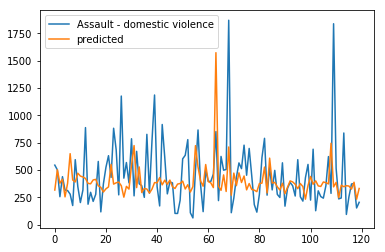

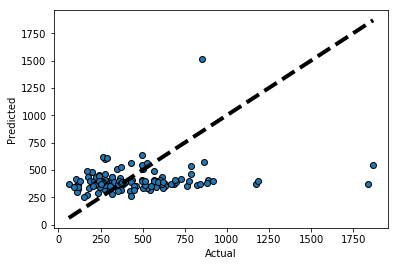

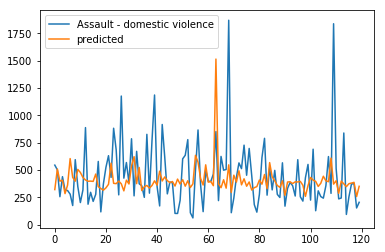

In [12]:
for alpha in [0.1,0.5,1]:
    start = timer()
    predictions, importants, _ = tfidf_cv(docs, target_df[['LGA','time_of_day','Assault - domestic violence']],
                                       max_features=5000, folds=3, alpha=alpha)
    end = timer()
    print('Finished TF-IDF 3 fold cross validation in',end-start,'seconds')
    # Need to aggregate preds from time_of_day back up to LGA level:
    predictions = predictions[['LGA','time_of_day','Assault - domestic violence',
                               'predicted']].groupby(['LGA']).agg({'Assault - domestic violence': lambda x: np.mean(x),
                                                                  'predicted': lambda x: np.mean(x)}).reset_index()
    tfidf_metrics(predictions, importants)
    # Just do a default pandas plot as well...
    predictions.plot()

Run an analysis on all 6 target variables. Store the results for later use in other models:

Assault - domestic violence
MAX FEATURES: 5000
ALPHA: 0.1
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 970.1516760231461 seconds
MOST IMPORTANT FEATURES:
plain 1990.85352969
ridg 1448.04837525
pine 1316.16059379
glen inn 1115.05077975
centuri 21 1006.51398494
12 948.078384206
liverpool -762.448848244
rent 748.063172372
tree -601.020782131
wentworth 596.143124614
griffith 489.821677407
broken hill 454.887768081
kempsey 451.449289259
coff 445.083216697
phil 430.641930065
#sydney -427.753574632
current -422.243983557
upper -418.403739193
hope 417.538655112
st 408.756636903
R2: -0.0142767696301
RMSE: 295.366552013
MAPE: 53.7514106261
Mean APE Baseline: 72.0914035637


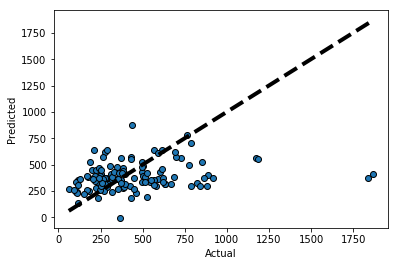

Assault - non-domestic violence
MAX FEATURES: 5000
ALPHA: 0.1
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 987.2714034030214 seconds
MOST IMPORTANT FEATURES:
#bbtid 1791.00216361
good morn sydney 1303.69952695
pine 1181.43860319
plain 1011.4857785
rent 988.063200874
ridg 836.051836661
wind km 792.225065595
rock -609.908899199
12 589.33522579
liverpool -561.153337951
advic 528.772226005
upper -518.179500938
abi 515.174600895
argu -496.247131235
morn sydney 482.753722788
dream 471.841853202
hous rent 454.467706151
tree -454.112926196
glen inn 442.586960579
alburi 432.941726618
R2: -0.489425881299
RMSE: 296.690722161
MAPE: 55.3968534365
Mean APE Baseline: 59.8326771602


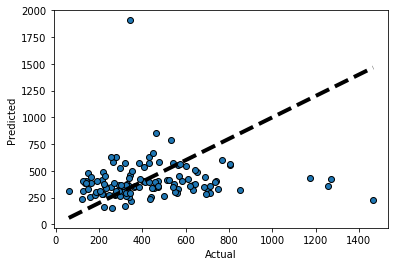

Fraud
MAX FEATURES: 5000
ALPHA: 0.1
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 994.2459470289759 seconds
MOST IMPORTANT FEATURES:
#bbtid 2196.71953034
abi 1916.8119001
good morn sydney 1575.72860216
#bronxnat #bbtid 1129.83455095
argu -1040.55367555
guo 962.675877912
bu 692.69226424
armidal 609.844710672
gundagai 602.23866162
#ausvot -595.701231537
2747 573.849467888
tonight 535.194494868
morn sydney 521.435436591
newcastl 519.492809415
#18thman #qlder 476.320676098
hunter -468.477529763
👍 -447.373031102
😀 436.752929615
plain 424.05246415
highway -416.709529412
R2: -0.0915902851072
RMSE: 302.158128457
MAPE: 42.3723663499
Mean APE Baseline: 50.564378615


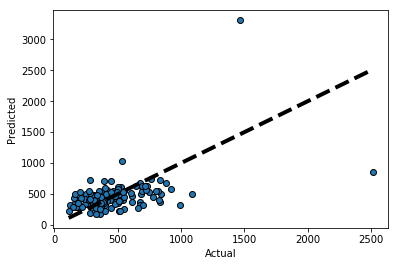

Sexual Offences
MAX FEATURES: 5000
ALPHA: 0.1
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 986.3728763349354 seconds
MOST IMPORTANT FEATURES:
goat 558.55230002
lismor 368.681653736
nsw centuri 340.080220808
degc 305.05266967
new england 299.746849272
murray -298.878944337
wind km 288.66612064
plain 287.341979993
liverpool -205.417508942
nsw 199.502131086
#sydney -196.861700457
sydney -182.478153371
feder -178.27437136
upper -178.134960456
zaytuna 170.398034949
dubbo 167.852848043
#bbtid 165.175856331
💙 164.255623667
school 142.734549203
june 139.990649387
R2: 0.151118021638
RMSE: 86.0089686298
MAPE: 41.2882214638
Mean APE Baseline: 53.0821806583


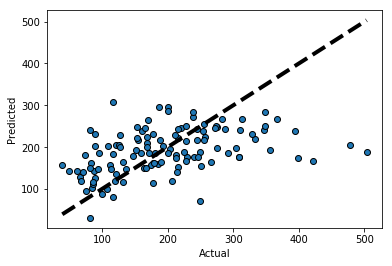

Malicious damage to property
MAX FEATURES: 5000
ALPHA: 0.1
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 975.3189829729963 seconds
MOST IMPORTANT FEATURES:
plain 4017.44629069
pine 3643.08616501
rent 3477.40827533
liverpool -2872.44529905
armidal 2253.29016441
ridg 2198.86044169
12 1828.70926817
dream 1510.87924378
tree -1459.26879793
appl -1257.25472733
🐾 -1216.36315111
hous rent 1171.40795473
richmond valley 1108.75738453
hunter 1044.24182477
glen inn 1035.25870269
#newcastl 1029.83200184
alburi 1025.76379988
#bbtid 1012.1837484
love love love 964.855463583
wineri -962.163289642
R2: -0.0158502457321
RMSE: 577.389476178
MAPE: 44.0291573599
Mean APE Baseline: 53.4238936165


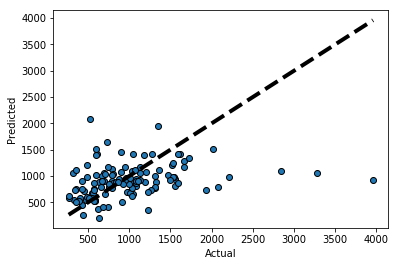

Prohibited weapons offences
MAX FEATURES: 5000
ALPHA: 0.1
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 964.7363047681283 seconds
MOST IMPORTANT FEATURES:
school 754.895390639
june 689.086627179
nsw centuri 544.898226452
#ausvot 368.016883119
#sydney -359.440364825
nsw 345.826083883
tenterfield 337.697564806
wentworth 316.191082088
deniliquin 309.935502216
wagga 298.441460563
feder -288.561175049
plain 276.111479801
#bbtid 275.25150136
alburi 262.047981455
muswellbrook 256.493413771
😬 254.949189971
rock -242.172294974
m1 -237.703403632
😴 221.683814585
current -220.872503258
R2: 0.244758842439
RMSE: 129.630312507
MAPE: 78.9722199545
Mean APE Baseline: 126.659859832


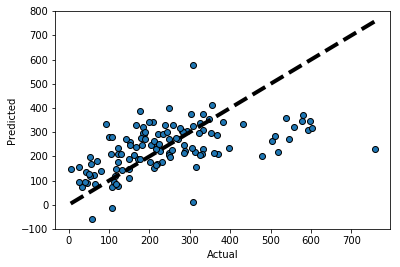

In [14]:
# 5000 max feat definitely better than 500 and reasonably quick with more explainability.
# 5k seems to be about the right number.
# Alpha of 0.1 seems reasonable to avoid convergence errors and smooth slightly.
mf=5000
alpha=0.1
tfidf_output = pd.DataFrame()
target_models = {}
for target in target_df.columns[2:]: # Start from 2 as we have a 2 column index
    print(target)
    print('MAX FEATURES:',mf)
    print('ALPHA:',alpha)
    start = timer()
    preds, importants, models = tfidf_cv(docs, target_df[['LGA','time_of_day',target]],
                                 max_features=mf, folds=5, alpha=alpha)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    target_models[target] = models
    # Need to aggregate preds from time_of_day back up to LGA level:
    preds = preds[['LGA','time_of_day',target,
                    'predicted']].groupby(['LGA']).agg({target: lambda x: np.mean(x),
                                                    'predicted': lambda x: np.mean(x)}).reset_index()
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [15]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_and_time_of_day_2016_Lasso_preds.csv",index=False)

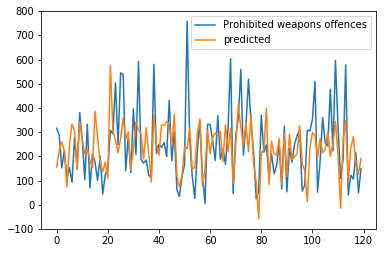

In [16]:
preds.plot()

Results are so good, lets see what happens with less folds and more test data:

MOST IMPORTANT FEATURES:
plain 2349.02646051
rent 1590.88313956
pine 1351.72708145
glen inn 1302.64753812
ridg 1236.1126964
tree -1230.8459913
12 1037.27459457
row 906.767733874
liverpool -741.24197705
wentworth 730.050934413
centuri 21 639.179674617
nsw 618.330167281
walgett 600.112424784
lightn 591.467683423
fun -584.913372933
kempsey 563.450891754
#nswrf -528.867098773
advic 515.391119436
central 509.7279313
alburi 498.166715275
R2: 0.85271417867
RMSE: 112.554676561
MAPE: 26.0164606363
Mean APE Baseline: 72.0914035637


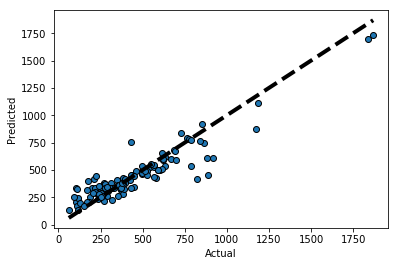

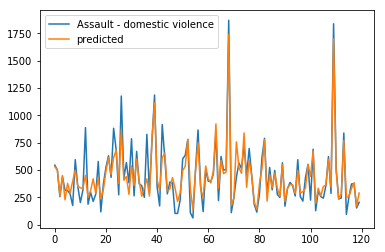

In [31]:
print('3 FOLDS ONLY:')
start = timer()
preds3, imps3, _ = tfidf_cv(docs, target_df[['LGA','time_of_day','Assault - domestic violence']],
                                   max_features=5000, folds=3, alpha=alpha)
end = timer()
print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
# Need to aggregate preds from time_of_day back up to LGA level:
preds3 = preds3[['LGA','time_of_day','Assault - domestic violence',
                           'predicted']].groupby(['LGA']).agg({'Assault - domestic violence': lambda x: np.mean(x),
                                                              'predicted': lambda x: np.mean(x)}).reset_index()
tfidf_metrics(preds3, imps3)
# Just do a default pandas plot as well...
preds3.plot()

In [34]:
preds3

,LGA,Assault - domestic violence,predicted
0,Albury,544.4263,529.706476
1,Armidale Regional,501.4681,500.784250
2,Ballina,255.7125,263.479890
3,Bathurst Regional,438.7931,450.169799
4,Bayside,315.9874,226.832332
5,Bega Valley,312.2606,378.116352
6,Bellingen,279.2213,287.561429
7,Berrigan,174.9883,397.873191
8,Blacktown,594.3767,497.365437
9,Bland,348.2010,350.596581


Problem is docs from same LGA are "leaking" into train data...

DOMESTIC VIOLENCE: shuffle=False
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 935.1634186729789 seconds
MOST IMPORTANT FEATURES:
rent 1896.57589082
plain 1649.77248943
pine 1565.90053994
ridg 1219.40284493
12 1058.24367649
glen inn 1031.38719038
barrier 756.647023217
lightn 711.91809015
tree -597.782250762
cowan -521.991173295
liverpool -513.235083513
wentworth 509.067578042
💗 508.107106231
kempsey 469.017417865
centuri 21 462.339978308
broken hill 461.770821942
alburi 459.177944208
#sydney -450.271403139
current -429.173730992
park nsw 427.42764791
R2: -0.0232171630126
RMSE: 296.665457608
MAPE: 55.8869020087
Mean APE Baseline: 72.0914035637


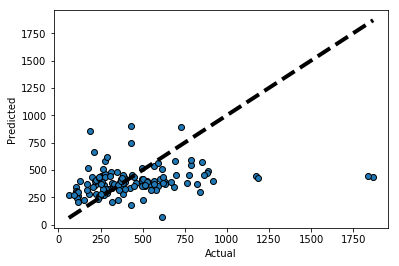

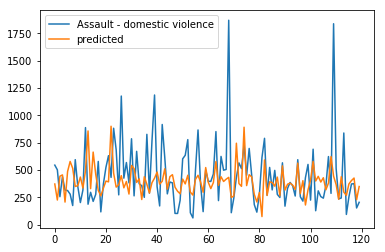

In [52]:
print('DOMESTIC VIOLENCE: shuffle=False')
start = timer()
preds3, imps3, _ = tfidf_cv(docs, target_df[['LGA','time_of_day','Assault - domestic violence']],
                                   max_features=5000, folds=5, alpha=alpha, shuffle=False)
end = timer()
print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
# Need to aggregate preds from time_of_day back up to LGA level:
preds3 = preds3[['LGA','time_of_day','Assault - domestic violence',
                           'predicted']].groupby(['LGA']).agg({'Assault - domestic violence': lambda x: np.mean(x),
                                                              'predicted': lambda x: np.mean(x)}).reset_index()
tfidf_metrics(preds3, imps3)
# Just do a default pandas plot as well...
preds3.plot()

In [68]:
from sklearn.utils import shuffle
from sklearn.model_selection import GroupKFold
xdf = pd.DataFrame(np.random.rand(10,2))
xdf
groups = [i // 2 for i in range(len(df))]
y = [i for i in range(len(df))]
X_shuffled, y_shuffled, groups_shuffled = shuffle(xdf, y, groups)
print(X_shuffled)
print(y_shuffled)

          0         1
5  0.274743  0.958089
1  0.515077  0.267852
0  0.131919  0.287343
6  0.642095  0.048999
7  0.212553  0.651151
8  0.488046  0.043500
4  0.322252  0.942798
2  0.288401  0.363586
9  0.310637  0.235395
3  0.995211  0.511571
[5, 1, 0, 6, 7, 8, 4, 2, 9, 3]


In [76]:
indices = np.arange(120)
print(indices)
np.random.shuffle(indices.reshape((-1, 2)))
indices

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


array([ 20,  21,  74,  75,  22,  23, 114, 115,  72,  73,  24,  25,  42,
        43,  10,  11,  28,  29,  76,  77,  48,  49,  40,  41,  50,  51,
        52,  53, 116, 117,  54,  55, 100, 101,  16,  17,  70,  71,  88,
        89,  36,  37,  82,  83,  68,  69,   8,   9,  56,  57,  86,  87,
        32,  33,  90,  91, 118, 119,  38,  39, 104, 105,  96,  97,  46,
        47,  92,  93,  12,  13,   0,   1,  18,  19,  94,  95,  62,  63,
        26,  27, 110, 111, 106, 107,  34,  35,  60,  61,  14,  15,   6,
         7,   2,   3,  66,  67,  80,  81,  44,  45, 112, 113,  30,  31,
       102, 103,  84,  85,   4,   5,  58,  59, 108, 109,  64,  65,  98,
        99,  78,  79])